## Standard imports

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cbook as cbook
from sklearn.linear_model import SGDClassifier
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# Import data
df = pd.read_csv('analysis-stock-change-5-quoted.csv', quotechar='|')
pd.set_option('display.max_colwidth', None)
df

,text,stock_change,compound,neg,neu,pos
0,AAK AB: AAK förväntar sig ett rörelseresultat för tredje kvartalet som är högre än vad tidigare förutsetts,5.87,0.0000,0.000,1.000,0.000
1,AAK AB: AAK:s delårsrapport för det andra kvartalet 2020 - utmanande start på kvartalet följt av en tydlig successiv förbättring,-7.47,0.5574,0.000,0.796,0.204
2,AAK AB: AAK:s delårsrapport för det första kvartalet 2020 - fortsatt resultattillväxt på en volatil marknad,-5.01,0.0000,0.000,1.000,0.000
3,Nya prekliniska data kring tasquinimod kommer att presenteras på det årliga mötet i American Society of Hematology (ASH),10.65,0.0000,0.000,1.000,0.000
4,Active Biotech Delårsrapport januari - september 2021,10.65,0.0000,0.000,1.000,0.000
...,...,...,...,...,...,...
15896,Storskogen Group AB: Första dag för handel i Storskogens B-aktier på Nasdaq Stockholm,31.17,-0.3182,0.161,0.839,0.000
15897,Ändring av antal aktier och röster i Truecaller AB (publ),-5.16,0.2960,0.000,0.804,0.196
15898,Truecaller AB: Truecaller samarbetar med Indian Railways för att skapa förtroende för kommunikationen med passagerare,23.16,0.6597,0.000,0.707,0.293
15899,Truecaller AB: Tredje kvartalet 2021: Truecaller rapporterar stark tillväxt i intäkter och antal användare kombinerat med god lönsamhet,33.84,0.7906,0.000,0.652,0.348


In [4]:
df.columns.values

array(['text', 'stock_change', 'compound', 'neg', 'neu', 'pos'],
      dtype=object)

In [5]:
df.columns.values.tolist() 

['text', 'stock_change', 'compound', 'neg', 'neu', 'pos']

In [6]:
df.notnull().sum()

text            15901
stock_change    15901
compound        15901
neg             15901
neu             15901
pos             15901
dtype: int64

In [7]:
df.notnull()

,text,stock_change,compound,neg,neu,pos
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,True,True,True,True,True,True
...,...,...,...,...,...,...
15896,True,True,True,True,True,True
15897,True,True,True,True,True,True
15898,True,True,True,True,True,True
15899,True,True,True,True,True,True


In [8]:
df.isnull().sum().sum() #missing data


0

In [9]:
df.dtypes

text             object
stock_change    float64
compound        float64
neg             float64
neu             float64
pos             float64
dtype: object

In [10]:
df.describe()

,stock_change,compound,neg,neu,pos
count,15901.000000,15901.000000,15901.000000,15901.000000,15901.000000
mean,9.667764,0.078892,0.009318,0.934916,0.055765
std,346.358810,0.204383,0.047074,0.122540,0.113429
min,-84.030000,-0.902200,0.000000,0.139000,0.000000
25%,-7.380000,0.000000,0.000000,0.892000,0.000000
50%,5.830000,0.000000,0.000000,1.000000,0.000000
75%,10.220000,0.000000,0.000000,1.000000,0.000000
max,37980.000000,0.910000,0.750000,1.000000,0.800000


In [11]:
# Filter out outlayers, in this case stocks that have gone up 200% or more
df = df[df['stock_change'] <= 150]

In [12]:
# Filter on stocks that have gone up or down 5%
df = df[abs(df['stock_change']) >= 5]

<AxesSubplot:>

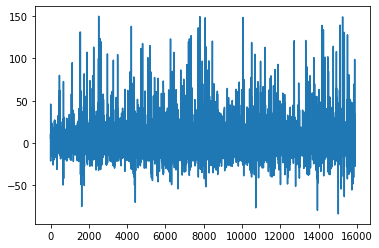

In [13]:
df['stock_change'].plot()

<AxesSubplot:>

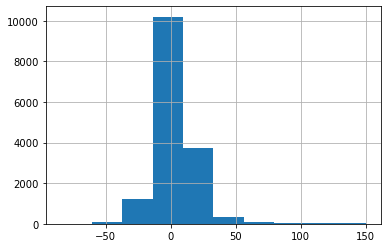

In [14]:
df['stock_change'].hist()

<AxesSubplot:>

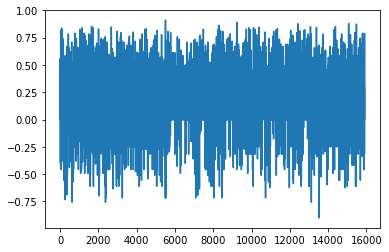

In [15]:
df['compound'].plot()

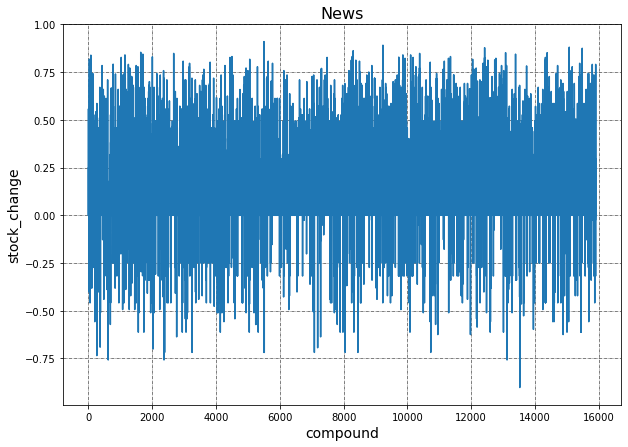

In [16]:
df['compound'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("News", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('stock_change', fontsize=14)
plt.xlabel('compound', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [17]:
df= df[df['compound'] != 0]
df.head(2)


,text,stock_change,compound,neg,neu,pos
1,AAK AB: AAK:s delårsrapport för det andra kvartalet 2020 - utmanande start på kvartalet följt av en tydlig successiv förbättring,-7.47,0.5574,0.0,0.796,0.204
5,Active Biotech offentliggör prospekt och viss ny finansiell information som återfinns i prospektet,5.44,0.2516,0.0,0.857,0.143


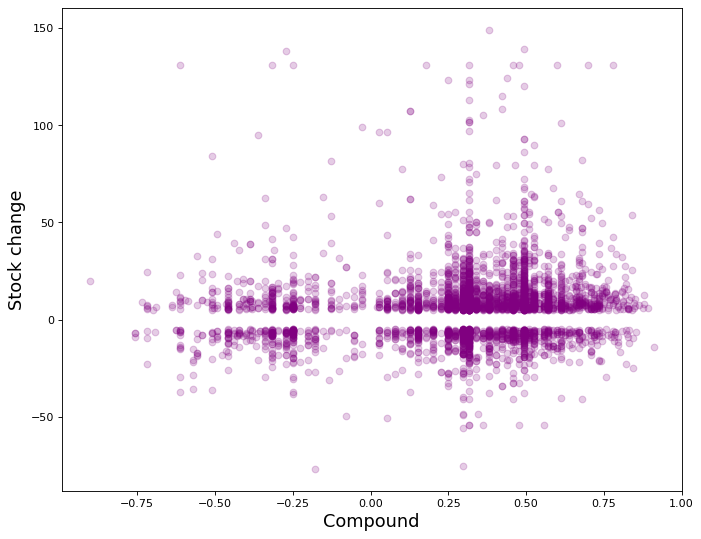

In [21]:
%matplotlib inline
figure(figsize=(10, 8), dpi=80)

plt.xlabel('Compound', fontsize=16)
plt.ylabel('Stock change', fontsize=16)
plt.scatter(df['compound'], df['stock_change'], c='purple', alpha=0.2);

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['text'],axis=1).values   # independant features
y = df['compound'].values# dependant variable

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [27]:
len(X_train)

3332

In [28]:
len(X_test)

833

In [29]:
df['text']

1                                                           AAK AB: AAK:s delårsrapport för det andra kvartalet 2020 - utmanande start på kvartalet följt av en tydlig successiv förbättring
5                                                                                         Active Biotech offentliggör prospekt och viss ny finansiell information som återfinns i prospektet
11                                                                                                                                                 Active Biotech offentliggör ny inriktning
12       Fas 2-studien LEGATO-HD med laquinimod i Huntingtons sjukdom presenteras på den vetenskapliga konferensen "American Academy of Neurology - AAN" i Philadelphia, PA, den 6 maj, 2019
17                                                                                              Addnode Group: INBJUDAN TILL PRESENTATION AV ADDNODE GROUPS DELÅRSRAPPORT, JANUARI-MARS 2020
                                                       

In [30]:
df['stock_change']

1        -7.47
5         5.44
11       14.64
12       -7.14
17        6.73
         ...  
15895    31.17
15896    31.17
15897    -5.16
15898    23.16
15899    33.84
Name: stock_change, Length: 4165, dtype: float64

In [31]:
df.head(5)

,text,stock_change,compound,neg,neu,pos
1,AAK AB: AAK:s delårsrapport för det andra kvartalet 2020 - utmanande start på kvartalet följt av en tydlig successiv förbättring,-7.47,0.5574,0.000,0.796,0.204
5,Active Biotech offentliggör prospekt och viss ny finansiell information som återfinns i prospektet,5.44,0.2516,0.000,0.857,0.143
11,Active Biotech offentliggör ny inriktning,14.64,0.3182,0.000,0.635,0.365
12,"Fas 2-studien LEGATO-HD med laquinimod i Huntingtons sjukdom presenteras på den vetenskapliga konferensen ""American Academy of Neurology - AAN"" i Philadelphia, PA, den 6 maj, 2019",-7.14,-0.4019,0.097,0.903,0.000
17,"Addnode Group: INBJUDAN TILL PRESENTATION AV ADDNODE GROUPS DELÅRSRAPPORT, JANUARI-MARS 2020",6.73,0.3254,0.000,0.811,0.189


In [32]:
X_train

array([[17.65  ,  0.3182,  0.    ,  0.813 ,  0.187 ],
       [-9.5   ,  0.34  ,  0.    ,  0.638 ,  0.362 ],
       [37.93  ,  0.4939,  0.    ,  0.775 ,  0.225 ],
       ...,
       [10.55  ,  0.3182,  0.    ,  0.723 ,  0.277 ],
       [ 6.58  ,  0.296 ,  0.    ,  0.872 ,  0.128 ],
       [-9.09  ,  0.296 ,  0.    ,  0.804 ,  0.196 ]])

In [35]:
X

array([[-7.47  ,  0.5574,  0.    ,  0.796 ,  0.204 ],
       [ 5.44  ,  0.2516,  0.    ,  0.857 ,  0.143 ],
       [14.64  ,  0.3182,  0.    ,  0.635 ,  0.365 ],
       ...,
       [-5.16  ,  0.296 ,  0.    ,  0.804 ,  0.196 ],
       [23.16  ,  0.6597,  0.    ,  0.707 ,  0.293 ],
       [33.84  ,  0.7906,  0.    ,  0.652 ,  0.348 ]])

In [36]:
clf = SGDClassifier(loss="log", penalty="l2")
clf.fit(X_test, y_test)

ValueError: Unknown label type: (array([-0.7579, -0.7184, -0.6369, -0.6249, -0.6124, -0.5978, -0.5719,
       -0.5574, -0.5423, -0.5267, -0.5106, -0.5046, -0.4939, -0.4588,
       -0.4404, -0.4278, -0.4215, -0.4084, -0.4019, -0.3885, -0.3818,
       -0.3612, -0.355 , -0.34  , -0.3182, -0.3089, -0.296 , -0.2732,
       -0.25  , -0.2263, -0.2023, -0.1779, -0.1531, -0.144 , -0.128 ,
       -0.1027, -0.0772, -0.0516, -0.0258,  0.0258,  0.0516,  0.0772,
        0.1027,  0.128 ,  0.1531,  0.1779,  0.2023,  0.2263,  0.25  ,
        0.2732,  0.296 ,  0.3182,  0.34  ,  0.347 ,  0.3612,  0.3818,
        0.4005,  0.4019,  0.4084,  0.4215,  0.4278,  0.4404,  0.4466,
        0.4588,  0.4648,  0.4767,  0.4939,  0.5106,  0.516 ,  0.5267,
        0.5423,  0.5574,  0.5719,  0.5766,  0.5859,  0.5994,  0.6124,
        0.6249,  0.6289,  0.6369,  0.6486,  0.656 ,  0.6597,  0.6705,
        0.6774,  0.6808,  0.6908,  0.7003,  0.7096,  0.7184,  0.7269,
        0.7351,  0.743 ,  0.7456,  0.7506,  0.7579,  0.765 ,  0.7713,
        0.7717,  0.7783,  0.7824,  0.7845,  0.7906,  0.7964,  0.802 ,
        0.8225,  0.8256,  0.8271,  0.8286,  0.8402,  0.875 ,  0.8806]),)

In [38]:
y_pred = clf.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(X_test, y_test)))

AttributeError: 'NoneType' object has no attribute 'shape'